In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
N = 676 # Number of Atoms
Nc = 1000
dt = 0.001
omega = np.arange(1, 380.5, 0.5)
nu = omega / 2 / np.pi
Nf = Nc*1
num_frame = Nf
fileName = "pdos.lammpstrj" #Read the PDOS file

In [3]:
def find_pdos(v_all, Nc, dt, omega):
    Nf = v_all.shape[0]
    M  = Nf - Nc
    vacf = np.zeros(Nc)
    for nc in range(Nc):
    #ratio = (nc+1)/Nc * 100    
        #print("PDOS Calculation %s%%" %ratio)
        for m in range(M+1):
            delta = np.sum(v_all[m + 0]*v_all[m + nc])
            vacf[nc] = vacf[nc] + delta   
    vacf = vacf / vacf[0]
    vacf_output = vacf
    vacf = vacf*(np.cos(np.pi*np.arange(Nc)/Nc)+1)*0.5
    vacf = vacf*np.append(np.ones(1), 2*np.ones(Nc-1))/np.pi
    pdos = np.zeros(len(omega))
    for n in range(len(omega)):
        pdos[n] = dt * sum(vacf * np.cos(omega[n] * np.arange(Nc) * dt))
    return(vacf_output, pdos)

In [4]:
v_all = np.zeros((num_frame, N, 3))
fin = open(fileName, "r")
for i in range(num_frame):
    #ratio = (i+1)/num_frame * 100 
    #print("Read Data %s%%" %ratio)
    initial = i * (9 + N)
    for j in range(9):
        fin.readline()
    for k in range(N):
        line = fin.readline().split()[2:]
        line = [float(l) for l in line]
        v_all[i, k] = line

vacf, pdos = find_pdos(v_all, Nc, dt, omega)
t = np.arange(Nc)*dt

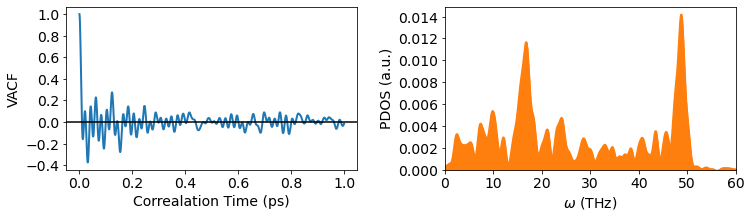

In [5]:
plt.figure(figsize=(12,3))
plt.subplot(1, 2, 1)
plt.plot(t, vacf, linewidth = 2, color="C0")
plt.axhline(y=0, color='black', linestyle='-')
plt.xticks(fontsize = 14)
plt.xlabel('Correalation Time (ps)', fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel('VACF', fontsize = 14)

plt.subplot(1, 2, 2)
plt.plot(nu, pdos, linewidth = 2, color="C1")
plt.fill_between(nu,pdos, step="pre", color = 'C1')
plt.ylim(ymin=0)
plt.xlim([0, 60])
plt.xticks(fontsize = 14)
plt.xlabel('$\omega$ (THz)', fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel('PDOS (a.u.)', fontsize = 14)
plt.subplots_adjust(wspace=0.3)

The original code was written by Fan Zheyong and Benward (hityingph@163.com)
[See more](https://zhuanlan.zhihu.com/p/390774537)